# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the training set

In [5]:
dataset_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/deeplearn/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output (중요)

* 과거의 60개의 정보를 가지고 다음의 정보를 예측함

In [7]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [10]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(rate=0.2))

### Adding the output layer

In [15]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [16]:
regressor.compile(optimizer="adam", loss="mean_squared_error")

### Fitting the RNN to the Training set

In [17]:
regressor.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
38/38 [==============================] - 15s 132ms/step - loss: 0.0370
Epoch 2/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0067
Epoch 3/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 8s 221ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 7s 188ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0056
Epoch 11/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0050
Epoch 12/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0038
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [18]:
dataset_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/deeplearn/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [20]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [22]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


### Visualising the results

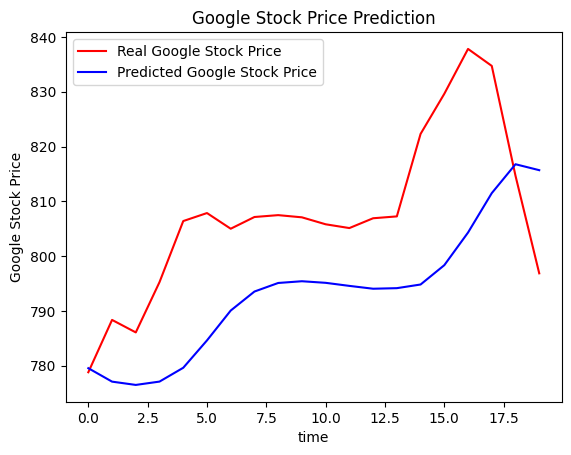

In [24]:
plt.plot(real_stock_price, color="red", label="Real Google Stock Price")
plt.plot(predicted_stock_price, color="blue", label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

## Part 4 - Improve and evaluate RNN

### Calculate RMSE for evaluate RNN

In [25]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

18.46416207775512

### Various method of improve model

* 훈련데이터 더 모으기 : 5년의 데이터가 아닌 10년의 데이터 등 더 많은 기간의 데이터를 이용.
* 시점의 개수 늘리기 : 60일 전의 주가를 기억 했지만 이 시점의 개수를 더 늘릴 수 있음.
* 다른 지표 추가하기 : 다른 회사의 주가가 구글의 주가와 연동된다는 직감이 들면 다른 주가를 새로운 지표로 추가할 수 있음.
* LSTM 충 추가하기 : RNN의 LSTM 층을 4개가 아닌 더 많은 층으로 구성할 수 있음.
* LSTM 층에 뉴런 추가하기: 문제의 복잡성에 더 잘 반응하려면 LSTM 층에 더 많은 뉴런을 추가 할 수 있음.